In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sympy.solvers import solve
from sympy import Symbol
import time

In [2]:
def createCircleEquation(h, k, r):
    #a, b = np.meshgrid(setupGraph(-30,30)[0] ,setupGraph(-30,30)[0])
    x = np.linspace(-30,30,100)
    y = np.linspace(-30,30,100)
    a, b = np.meshgrid(x, y)
    C = (a-h) ** 2 + (b-k) ** 2 - r**2
    return ([a, b, C])

In [3]:
def generateRandomPoints(h,k,r):
    points = []
    randomX = round(random.uniform(-r, r),5) #only works when h and k are 0
    randomYs = [math.sqrt(abs(r**2 - (randomX - h)**2)) + k, -1*(math.sqrt(abs(r**2 - (randomX - h)**2)) + k)]
    points.append([randomX, random.choice(randomYs)])
    
    for i in range(3, 6):
        distance = 0
        minDistance = 2
        while distance < minDistance:
            tempRandomX = round(random.uniform(-r, r),5)
            tempRandomYs = [math.sqrt(abs(r**2 - (tempRandomX - h)**2)) + k, -1*(math.sqrt(abs(r**2 - (tempRandomX - h)**2)) + k)]
            tempRandomY = random.choice(tempRandomYs)
            
            bool = True
            for point in points:
                distance = math.sqrt((point[0] - tempRandomX)**2 + (point[1] - tempRandomY)**2)
                if distance < minDistance:
                    bool = False
                    break 
            
            if bool == True:
                points.append([tempRandomX, tempRandomY])

    return(points)

In [4]:
def chooseRandomRadius():
    minDistance = 2
    h = 0 
    k = 0 
    numCircles = random.randint(4,4)
    circles = []
    
    r = 2
    for i in range (1, numCircles):
        r = random.randint(r + minDistance, r + minDistance + 6)
        circles.append([h, k, r])
    
    return(circles)

In [5]:
def findClosestPoint(firstPoint, listOfPoints):
    minDist = 100000000
    minDistPoint = 0
    for point in listOfPoints:
        distance = ((point[0]-firstPoint[0])**2 + (point[1]-firstPoint[1])**2)**(1/2)
        if distance < minDist:
            minDist = distance
            minDistPoint = point
    return(minDistPoint)

In [6]:
def convertAngle(angle, yCoord):
    if yCoord < 0:
        adjustedA = 360 - angle
    else:
        adjustedA = angle
    return adjustedA

In [7]:
#baseline version of the algorithm
def makeConnectionsBASIC(points):
    randomPoints = []
    for point in points:
        randomPoints.append(point)
                
    lines = []
    firstPoint = random.choice(randomPoints)
    randomPoints.remove(firstPoint)
    while len(randomPoints) != 0:
        secondPoint = findClosestPoint(firstPoint, randomPoints)
        lines.append((firstPoint, secondPoint))
        randomPoints.remove(secondPoint)
        firstPoint = secondPoint
        
    return(lines)

In [8]:
#current connection algorithm
def makeConnections(points):
    randomPoints = points.copy()
    
    lines = []
    firstCircle = random.choice(randomPoints)
    firstPoint = random.choice(firstCircle)
    randomPoints[randomPoints.index(firstCircle)].remove(firstPoint)
    for item in randomPoints:
        item.remove(item[0])
    while len(randomPoints) != 0:
        masterList = []
        for item in randomPoints:
            if item != firstCircle:
                for point in item:
                    masterList.append(point)
        
        if len(masterList) != 0:
            secondPoint = findClosestPoint(firstPoint, masterList)
        else:
            break
            
        lines.append((firstPoint, secondPoint))
        for item in randomPoints:
            if secondPoint in item:
                randomPoints[randomPoints.index(item)].remove(secondPoint)
                firstCircle = item
            if len(item) == 0:
                randomPoints.remove(item)
        firstPoint = secondPoint
        
        print(len(lines))
    return(lines)

In [9]:
#advanced connection algorithm still being developed
#format of points: [[r,[a,b], [c,d],[e,f]], [r,[g,h],[h,i]]]
def makeConnectionsINPROG(points):
    randomPoints = points.copy()
    
    lines = []
    firstCircle = randomPoints[-1]
    firstPoint = random.choice(firstCircle[1:])
    #randomPoints[randomPoints.index(firstCircle)].remove(firstPoint)
    while len(randomPoints) != 0:
        print(firstPoint)
        r = randomPoints[randomPoints.index(firstCircle) - 1][0]
        
        #calculate range of viability for first point within second circle in degrees
        m = Symbol('m', real=True)
        sol = solve((r**2) + ((r**2)*(m**2)) - ((firstPoint[1] - (firstPoint[0]*m))**2), m)
        
        
        x = Symbol('x', real=True)
        coord1 = solve(x**2 + (sol[0]*x + (firstPoint[1] - sol[0]*firstPoint[0]))**2 - r**2, x)
        
        xInt1 = coord1[0]
        yInt1 = (sol[0]*xInt1) + (firstPoint[1] - sol[0]*firstPoint[0])
        
        maxDist = ((xInt1-firstPoint[0])**2 + (yInt1-firstPoint[1])**2)**(1/2)
        secondPoint = findClosestPoint(firstPoint, randomPoints[randomPoints.index(firstCircle) - 1][1:])
        dist = ((secondPoint[0]-firstPoint[0])**2 + (secondPoint[1]-firstPoint[1])**2)**(1/2)
        
        if dist <= maxDist:
            lines.append((firstPoint, secondPoint))
            
        firstInd = randomPoints.index(firstCircle)
        randomPoints[firstInd].remove(firstPoint)
        if len(randomPoints[firstInd]) == 1:
            if firstInd == 1:
                del randomPoints[1]
                del randomPoints[0]
            else:
                del randomPoints[firstInd]
                firstCircle = randomPoints[firstInd-1]
                firstPoint = random.choice(firstCircle[1:])
        else:
            firstPoint = random.choice(randomPoints[firstInd][1:])
        
    return(lines)

In [10]:
def plotGraph(circles):
    
    figure, axes = plt.subplots()
    
    counter = 0
    i = 0
    points = []
    for item in circles:
        points.append([item[2]])
        axes.contour( createCircleEquation(circles[counter][0], circles[counter][1], circles[counter][2])[0] , createCircleEquation(circles[counter][0], circles[counter][1], circles[counter][2])[1] , createCircleEquation(circles[counter][0], circles[counter][1], circles[counter][2])[2], [0] )        
        for point in generateRandomPoints(circles[counter][0], circles[counter][1], circles[counter][2]):
            plt.plot(point[0], point[1], 'ro')
            points[i].append([point[0], point[1]])
        counter += 1
        i += 1
    
    axes.set_aspect( 1 )
    
    for pair in makeConnections(points):
        plt.plot([pair[0][0],pair[1][0]],[pair[0][1],pair[1][1]],'k-')
        
        
    plt.title( 'Circle' )
    plt.show()

1
2
3
4
5
6
7
8
9
10


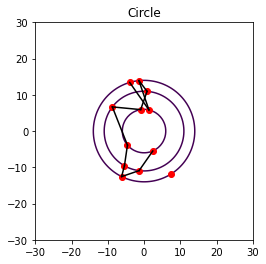

The time of execution of above program is : 112.4570369720459 ms


In [12]:
#calculating runtime of program when it is called
#produced road networks
start = time.time()
plotGraph(chooseRandomRadius())
end = time.time()
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")